In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./../gp_sinkhorn/')
from SDE_solver import solve_sde_RK
from MLE_drift import *
import torch

from celluloid import Camera
from IPython.display import HTML
import math

In [2]:
data,data_cut,cutting_time= pickle.load(open("./../assets/motion_data.pkl","rb"))

In [3]:
d = []
for k in data.keys():
    for i in data[k].keys():
        d.append(data[k][i])


In [4]:
X_0 = torch.Tensor([i[0,:] for i in d])
X_1 = torch.Tensor([i[-1,:] for i in d])


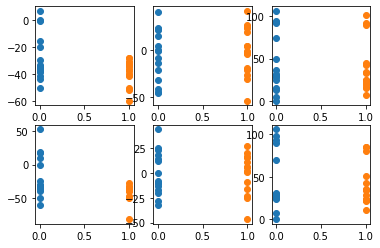

In [5]:

for i in range(X_0.shape[1]):
    plt.subplot(2,3,i+1)
    plt.scatter([0]*X_0.shape[0],X_0[:,i])
    plt.scatter([1]*X_0.shape[0],X_1[:,i])
plt.show()

In [10]:
dt = 0.02
N = int(math.ceil(1.0/dt))


# subsample the trajectory so they all have the same shape and we can use them as prior for MLEDrift
prior_Xts = torch.tensor([i[::int(i.shape[0]/N),:][:(N+1),:] for i in d])


prior_drift = None

result = MLE_IPFP(
    X_0,X_1,N=N,sigma=0.5,
    prior_drift=prior_drift,prior_Xts=prior_Xts,
    prior_X_0=None, iteration=10, refinement_iterations=0,
    decay_sigma=1, gp_mean_prior_flag=True
)


100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


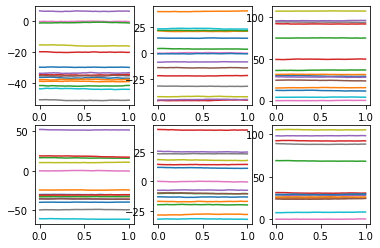

In [11]:
M = result[-1][1]
for n in range(6):
    plt.subplot(2,3,n+1)
    for i in range(M.shape[0]):
        plt.plot(M[i,:,-1],M[i,:,n])
    